In [1]:
import timeit
from keras.models import Model,Sequential
from keras.layers import Input, Embedding, LSTM, Dense,concatenate,  Dropout, Flatten, Conv2D, MaxPool2D, Activation,MaxPooling2D
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import RMSprop, adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import plot_model

import tensorflow as tf
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import timeit

############################################################################
numpy.random.seed(110)

C:\Users\BRG_user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Defining New Activation functions
############################################################################
def X_1(x):
    return (K.pow(x,1))
get_custom_objects().update({'X_1': Activation(X_1)})
############################################################################
def X_2(x):
    return (K.pow(x,2))/2
get_custom_objects().update({'X_2': Activation(X_2)})
############################################################################
def X_3(x):
    return (K.pow(x,3))/6
get_custom_objects().update({'X_3': Activation(X_3)})
############################################################################
def X_4(x):
    return (K.pow(x,4))/24
get_custom_objects().update({'X_4': Activation(X_4)})
############################################################################
def X_5(x):
    return (K.pow(x,5))/120
get_custom_objects().update({'X_5': Activation(X_5)})
###############################################################################
def X_6(x):
    return (K.pow(x,6))/720
get_custom_objects().update({'X_6': Activation(X_6)})
############################################################################
def X_7(x):
    return (K.pow(x,7))/5040
get_custom_objects().update({'X_7': Activation(X_7)})
############################################################################
def X_8(x):
    return (K.pow(x,8))/40320
get_custom_objects().update({'X_8': Activation(X_8)})
###############################################################################
def X_9(x):
    return (K.pow(x,8))/362880
get_custom_objects().update({'X_9': Activation(X_9)})
###############################################################################


In [3]:
#Define normalize Functions

def normalize(d):
    # d is a (n x dimension) np array
    d -= np.min(d, axis=0)
    d /= np.ptp(d, axis=0)
    return d



#Creates plot for loss and trainning functions
def plot_(history):
    training_loss1 = history.history['loss']
    test_loss1 = history.history['val_loss']
    epoch_count = range(1, len(training_loss1) + 1)
    plt.plot(epoch_count, training_loss1, 'r--')
    plt.plot(epoch_count, test_loss1, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show();

In [4]:
epochs=10

Train on 600 samples, validate on 160 samples
Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3361 - acc: 0.6583 - val_loss: 0.4207 - val_acc: 0.5500
Epoch 2/10
600/600 [==============================] - 0s 73us/step - loss: 0.3209 - acc: 0.6483 - val_loss: 0.3713 - val_acc: 0.5750
Epoch 3/10
600/600 [==============================] - 0s 75us/step - loss: 0.3042 - acc: 0.6617 - val_loss: 0.3337 - val_acc: 0.6313
Epoch 4/10
600/600 [==============================] - 0s 71us/step - loss: 0.3054 - acc: 0.6683 - val_loss: 0.3434 - val_acc: 0.5813
Epoch 5/10
600/600 [==============================] - 0s 71us/step - loss: 0.2905 - acc: 0.6750 - val_loss: 0.3012 - val_acc: 0.6625
Epoch 6/10
600/600 [==============================] - 0s 80us/step - loss: 0.2814 - acc: 0.6700 - val_loss: 0.3082 - val_acc: 0.6250
Epoch 7/10
600/600 [==============================] - 0s 80us/step - loss: 0.2927 - acc: 0.6683 - val_loss: 0.2960 - val_acc: 0.6875
Epoch 8/10
600/600 [====

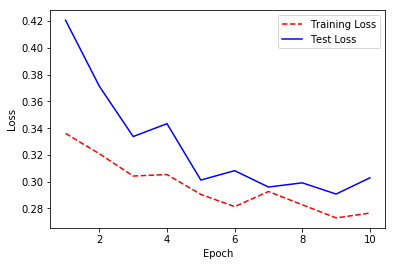

160/160 [==============================] - 0s 19us/step

acc: 65.62%


In [5]:
# this code is copied from 
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# we just changed loss='binary_crossentropy' to 
# with this dataset https://www.kaggle.com/kumargh/pimaindiansdiabetescsv/version/1#
# and define validation_data

# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[0:600,0:8]
Y = dataset[0:600,8]

X_test = dataset[600:760,0:8]
Y_test = dataset[600:760,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# Fit the model

start = timeit.default_timer()
history=model.fit(X, Y, validation_data=(X_test, Y_test), epochs=epochs, batch_size=10)
end = timeit.default_timer()

plot_(history)
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


In [6]:
#Our Model With 4 Layers
# with this dataset https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

hidden_dimention=5
model = Sequential()

in_ = Input(shape=(8,))


Layer_1_Act_X_1=Dense(hidden_dimention, activation='X_1')(in_)
################################################################
Layer_1_Act_X_2=Dense(hidden_dimention, activation='X_2')(in_)
###############################################################
Layer_1_Act_X_3=Dense(hidden_dimention, activation='X_3')(in_)
###############################################################
Layer_1_Act_X_4=Dense(hidden_dimention, activation='X_4')(in_)
###############################################################
Layer_1_Act_X_5=Dense(hidden_dimention, activation='X_5')(in_)
###############################################################
Layer_1_Act_X_6=Dense(hidden_dimention, activation='X_6')(in_)
###############################################################
Layer_1_Act_X_7=Dense(hidden_dimention, activation='X_7')(in_)
###############################################################
Layer_1_Act_X_8=Dense(hidden_dimention, activation='X_8')(in_)
###############################################################
Concatenate_First_Layer = concatenate([Layer_1_Act_X_1,Layer_1_Act_X_2,Layer_1_Act_X_3,Layer_1_Act_X_4,Layer_1_Act_X_5,Layer_1_Act_X_6,Layer_1_Act_X_7,Layer_1_Act_X_8])

Out_put_first_layer=Dense(hidden_dimention, activation='linear')(Concatenate_First_Layer)

###############################################################
Layer_2_Act_X_1=Dense(hidden_dimention, activation='X_1')(Out_put_first_layer)
################################################################
Layer_2_Act_X_2=Dense(hidden_dimention, activation='X_2')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_3=Dense(hidden_dimention, activation='X_3')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_4=Dense(hidden_dimention, activation='X_4')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_5=Dense(hidden_dimention, activation='X_5')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_6=Dense(hidden_dimention, activation='X_6')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_7=Dense(hidden_dimention, activation='X_7')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_8=Dense(hidden_dimention, activation='X_8')(Out_put_first_layer)
###############################################################


Concatenate_second_Layer = concatenate([Layer_2_Act_X_1,Layer_2_Act_X_2,Layer_2_Act_X_3,Layer_2_Act_X_4,Layer_2_Act_X_5,Layer_2_Act_X_6,Layer_2_Act_X_7,Layer_2_Act_X_8])

Out_put=Dense(1, activation='linear')(Concatenate_second_Layer)

model = Model(in_ , Out_put)
#model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])



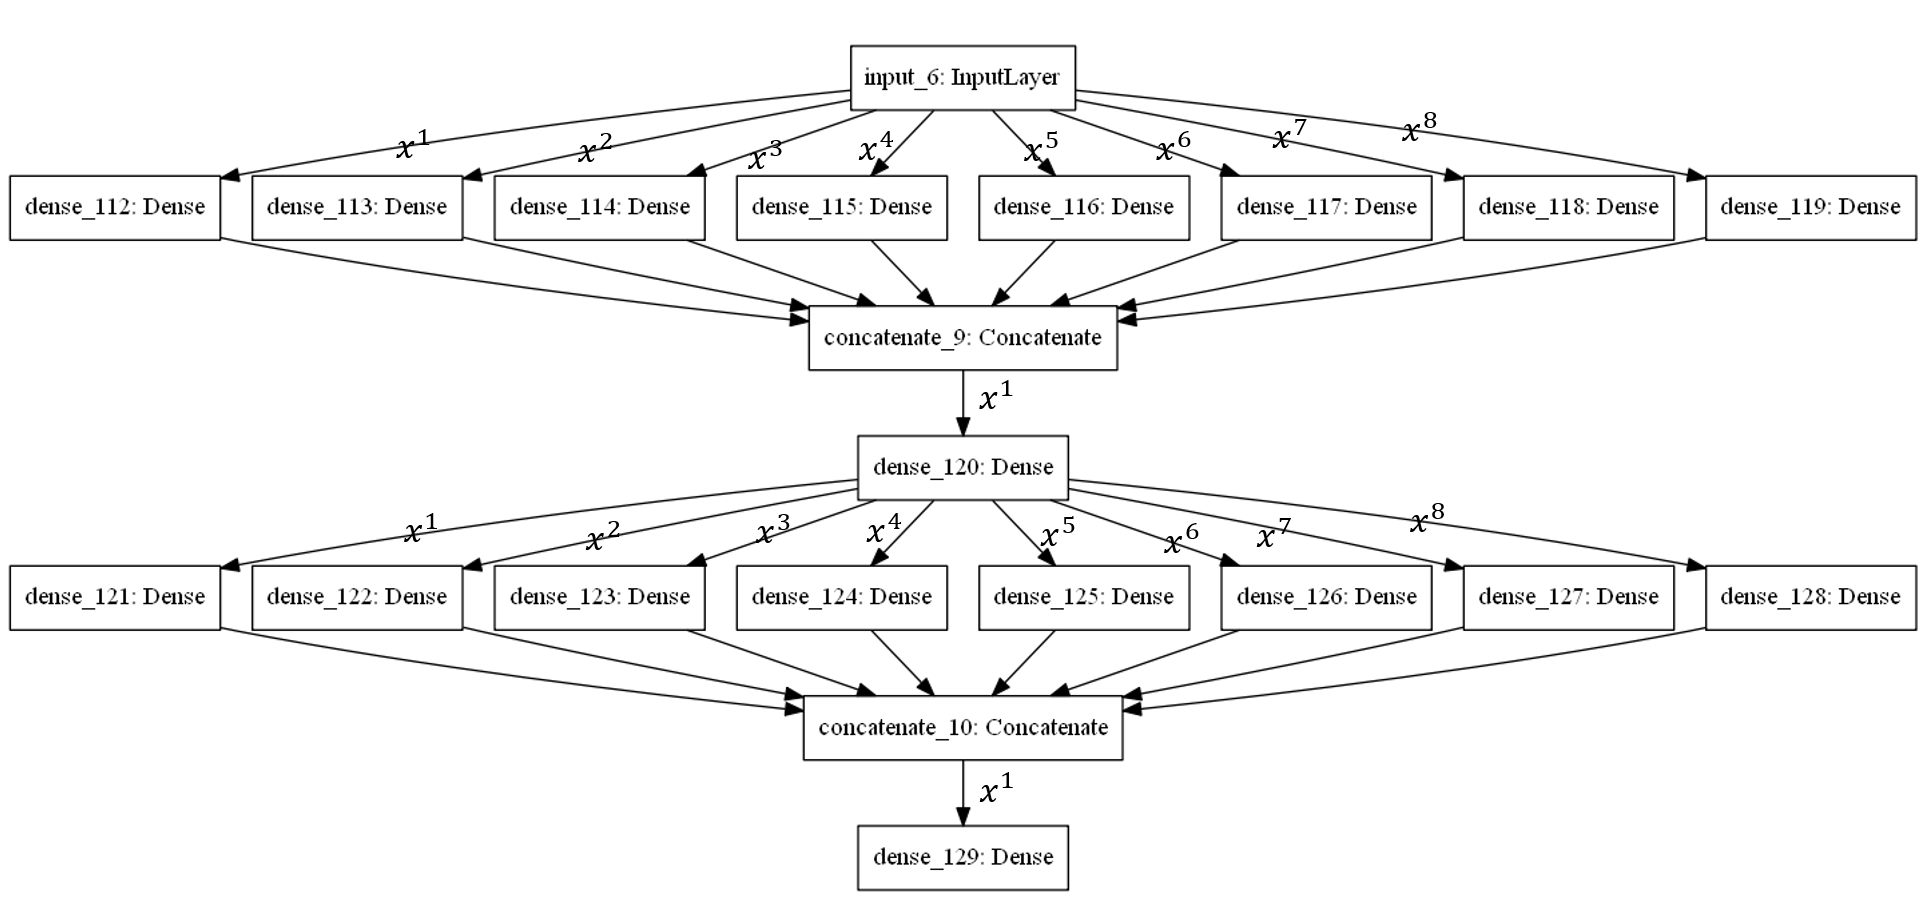

In [7]:
from IPython.display import Image
Image(filename='model_4_layers.png')

Train on 600 samples, validate on 160 samples
Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2207 - acc: 0.6583 - val_loss: 0.1971 - val_acc: 0.6438
Epoch 2/10
600/600 [==============================] - 0s 148us/step - loss: 0.1945 - acc: 0.7067 - val_loss: 0.1891 - val_acc: 0.6938
Epoch 3/10
600/600 [==============================] - 0s 138us/step - loss: 0.1894 - acc: 0.7050 - val_loss: 0.1824 - val_acc: 0.7188
Epoch 4/10
600/600 [==============================] - 0s 150us/step - loss: 0.1839 - acc: 0.7267 - val_loss: 0.1764 - val_acc: 0.7437
Epoch 5/10
600/600 [==============================] - 0s 158us/step - loss: 0.1802 - acc: 0.7250 - val_loss: 0.1717 - val_acc: 0.7812
Epoch 6/10
600/600 [==============================] - 0s 155us/step - loss: 0.1776 - acc: 0.7400 - val_loss: 0.1687 - val_acc: 0.7875
Epoch 7/10
600/600 [==============================] - 0s 143us/step - loss: 0.1762 - acc: 0.7467 - val_loss: 0.1718 - val_acc: 0.7375
Epoch 8/10
600/600

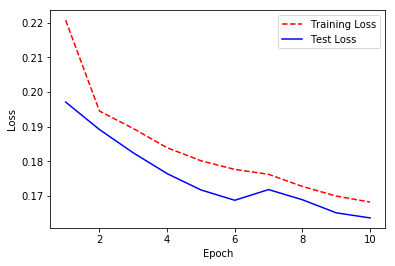

160/160 [==============================] - 0s 25us/step

acc: 78.75%


In [8]:
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
######################################################################
# it is really important . with out normalization this method will not work
dataset=normalize(dataset)
# split into input (X) and output (Y) variables
X = dataset[0:600,0:8]
Y = dataset[0:600,8]

X_test = dataset[600:760,0:8]
Y_test = dataset[600:760,8]


# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# Fit the model
start = timeit.default_timer()
history=model.fit(X, Y, validation_data=(X_test, Y_test), epochs=epochs, batch_size=10)
end = timeit.default_timer()
plot_(history)
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [9]:
#Our Model With 2 Layers
# with this dataset https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

hidden_dimention=50
model = Sequential()

in_ = Input(shape=(8,))


Layer_1_Act_X_1=Dense(hidden_dimention, activation='X_1')(in_)
################################################################
Layer_1_Act_X_2=Dense(hidden_dimention, activation='X_2')(in_)
###############################################################
Layer_1_Act_X_3=Dense(hidden_dimention, activation='X_3')(in_)
###############################################################
Layer_1_Act_X_4=Dense(hidden_dimention, activation='X_4')(in_)
###############################################################
Layer_1_Act_X_5=Dense(hidden_dimention, activation='X_5')(in_)
###############################################################
Layer_1_Act_X_6=Dense(hidden_dimention, activation='X_6')(in_)
###############################################################
Layer_1_Act_X_7=Dense(hidden_dimention, activation='X_7')(in_)
###############################################################
Layer_1_Act_X_8=Dense(hidden_dimention, activation='X_8')(in_)
###############################################################
Concatenate_First_Layer = concatenate([Layer_1_Act_X_1,Layer_1_Act_X_2,Layer_1_Act_X_3,Layer_1_Act_X_4,Layer_1_Act_X_5,Layer_1_Act_X_6,Layer_1_Act_X_7,Layer_1_Act_X_8])

Out_put=Dense(1, activation='linear')(Concatenate_First_Layer)

model = Model(in_ , Out_put)
#model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])



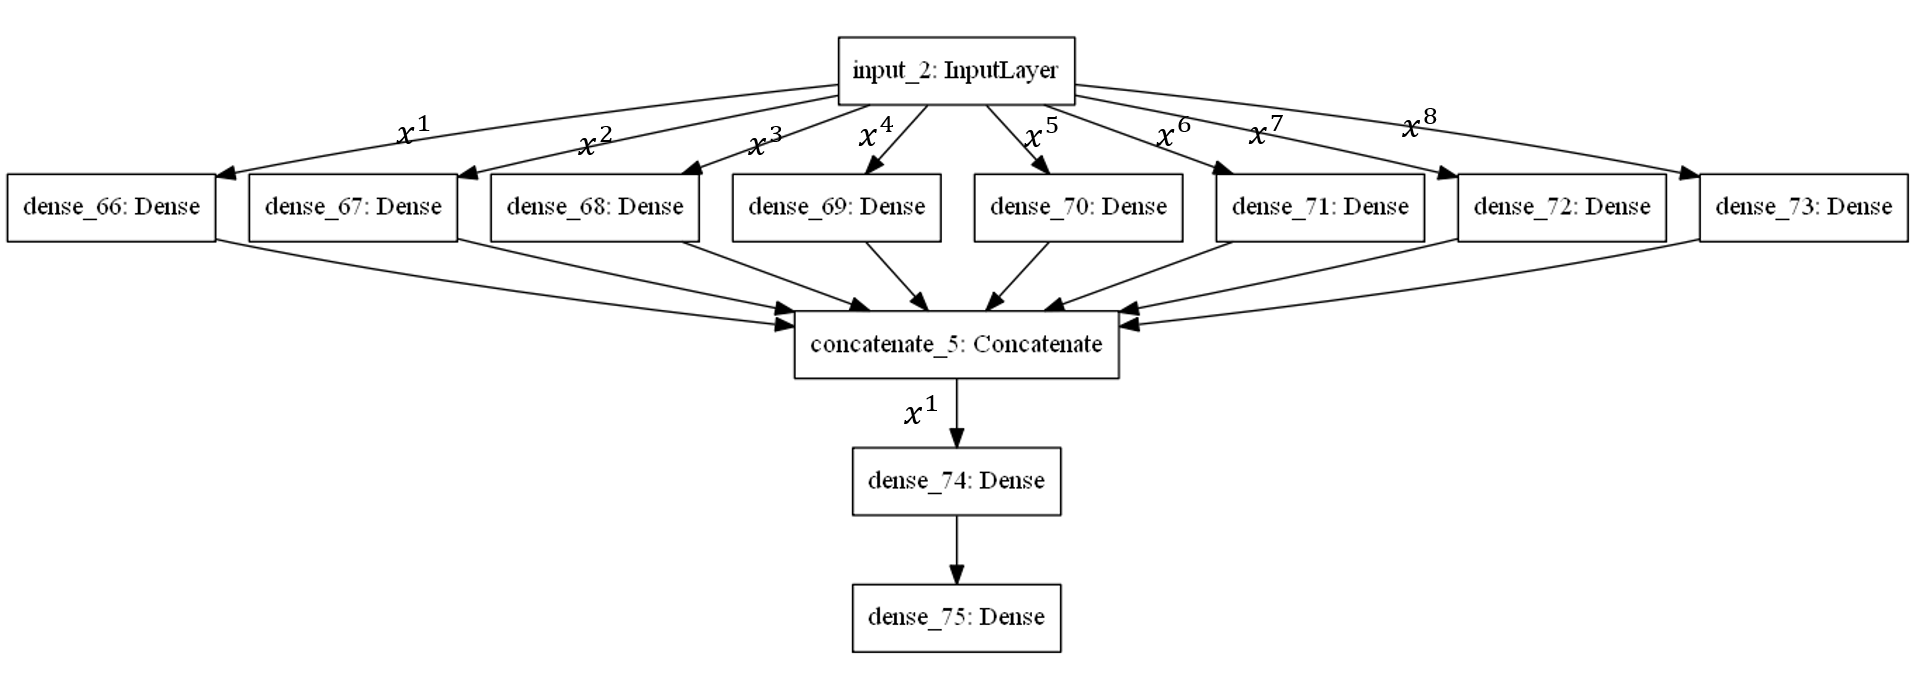

In [10]:
from IPython.display import Image
Image(filename='model_2_layers.png')

Train on 600 samples, validate on 160 samples
Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.2197 - acc: 0.6850 - val_loss: 0.1954 - val_acc: 0.6625
Epoch 2/10
600/600 [==============================] - 0s 128us/step - loss: 0.1935 - acc: 0.7083 - val_loss: 0.1840 - val_acc: 0.7063
Epoch 3/10
600/600 [==============================] - 0s 123us/step - loss: 0.1867 - acc: 0.7067 - val_loss: 0.1757 - val_acc: 0.7562
Epoch 4/10
600/600 [==============================] - 0s 123us/step - loss: 0.1795 - acc: 0.7383 - val_loss: 0.1695 - val_acc: 0.7750
Epoch 5/10
600/600 [==============================] - 0s 116us/step - loss: 0.1746 - acc: 0.7417 - val_loss: 0.1647 - val_acc: 0.8000
Epoch 6/10
600/600 [==============================] - 0s 119us/step - loss: 0.1709 - acc: 0.7417 - val_loss: 0.1635 - val_acc: 0.7937
Epoch 7/10
600/600 [==============================] - 0s 110us/step - loss: 0.1692 - acc: 0.7617 - val_loss: 0.1658 - val_acc: 0.7500
Epoch 8/10
600/600

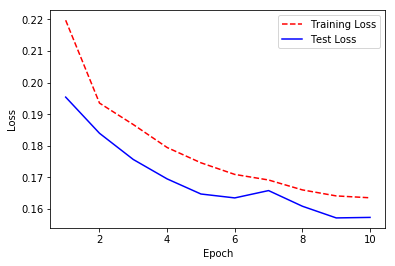

160/160 [==============================] - 0s 31us/step

acc: 76.88%


In [11]:
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
######################################################################
# it is really important . with out normalization this method will not work
dataset=normalize(dataset)
# split into input (X) and output (Y) variables
X = dataset[0:600,0:8]
Y = dataset[0:600,8]

X_test = dataset[600:760,0:8]
Y_test = dataset[600:760,8]


# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# Fit the model
start = timeit.default_timer()
history=model.fit(X, Y, validation_data=(X_test, Y_test), epochs=epochs, batch_size=10)
end = timeit.default_timer()
plot_(history)
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))